###  Objetivo:  Analisar e visualizar a evolução dos meios de pagamento utilizados pela população brasileira ao longo dos últimos anos, identificando tendências, mudanças de comportamento e possíveis causas.

Data: abril de 2025

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

####   Fonte: Transação por meio de Pagamento, quantidade e valor

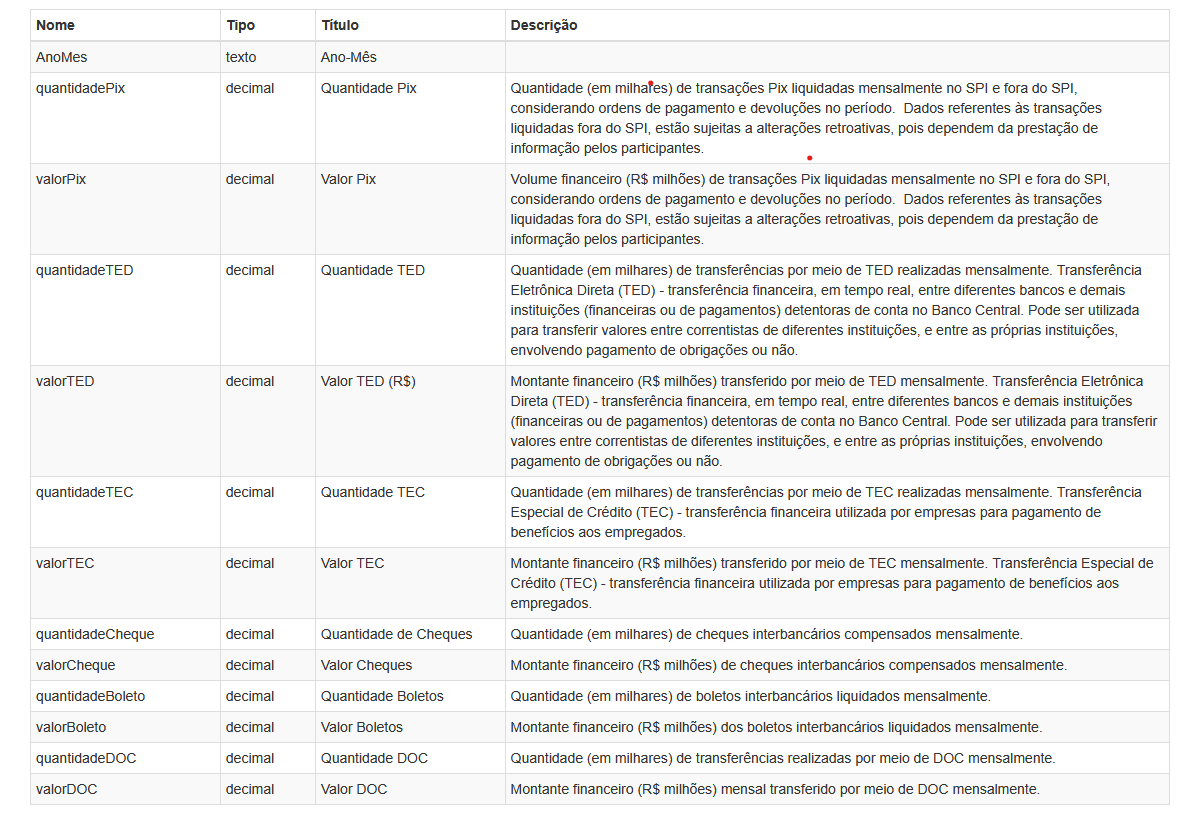

In [34]:
# Metadados BACEN
#https://dadosabertos.bcb.gov.br/dataset/estatisticas-meios-pagamentos
from IPython.display import Image, display
caminho_imagem = r'C:\Users\user\OneDrive\evolucao_meios_pagamentos\metadados_bacen.png'
display(Image(filename=caminho_imagem))


In [35]:
# Fonte de dados Banco central. Estatísticas de Meios de Pagamentos. Meios de pag mensais
url ="https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosMensalDA(AnoMes=@AnoMes)?@AnoMes='201001'&$top=1000&$format=text/csv&$select=AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC" 
response = requests.get(url)

if response.status_code == 200:
    print ('Sucesso')
else:
    print(f"Erro na requisição: {response.status_code}")
    
font1 = pd.read_csv(url)
font1
    

Sucesso


,AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC
0,202502,"5608079,68","2432126,06","61949,08","3378764,96",0,0,"8350,17","33019,98","324481,7","488180,37",0,0
1,202501,"5682523,57","2470308,13","62232,13","3705721,69",0,0,"9199,15","36429,91","338952,59","519244,8",0,0
2,202412,"6439204,14","2779574,36","76611,11","4257762,35",0,0,"9616,44","37774,51","361042,81","566693,06",0,0
3,202411,"5801999,45","2457454,49","65815,9","3503713,5",0,0,"9018,91","34430,29","332501,15","512370,3",0,0
4,202410,"5719639,76","2477086,52","68590,51","3885789,81",0,0,"10202,17","39646,01","362192,91","563986,63",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,201005,0,0,"7299,81","724099,48","186,06","214,53","92581,25","92690,41","148708,89","168090,89","16158,26","15500,81"
178,201004,0,0,"6821,98","705542,93","188,77",219,91287,"89204,08","145113,49","164958,58","15955,47","15550,48"
179,201003,0,0,"7592,77","759814,19","195,7","228,04","103296,21","99210,39","155779,53","176688,33","16411,17","16707,74"
180,201002,0,0,"6129,02","595672,64","184,5","209,06","85861,81","80062,1","132531,34","143732,52","13701,31","13775,74"


#### Perguntas
Como evoluiu cada meio de pagamento considerando valor e quantidade?
Houve impacto da pandemia no comportamento de pagamento?
Como evoluiu ao longo do tempo a utilização por tipo de canal?
Houve impacto da pandemia no comportamento de pagamento?

### Análise Descritiva  da Quantidade de Transação por  Meio de Pagamento

In [36]:
meio_qtd= font1.copy()
meio_qtd= meio_qtd[['AnoMes','quantidadePix', 'quantidadeTED', 'quantidadeTEC','quantidadeCheque','quantidadeBoleto','quantidadeDOC']]
meio_qtd

,AnoMes,quantidadePix,quantidadeTED,quantidadeTEC,quantidadeCheque,quantidadeBoleto,quantidadeDOC
0,202502,"5608079,68","61949,08",0,"8350,17","324481,7",0
1,202501,"5682523,57","62232,13",0,"9199,15","338952,59",0
2,202412,"6439204,14","76611,11",0,"9616,44","361042,81",0
3,202411,"5801999,45","65815,9",0,"9018,91","332501,15",0
4,202410,"5719639,76","68590,51",0,"10202,17","362192,91",0
...,...,...,...,...,...,...,...
177,201005,0,"7299,81","186,06","92581,25","148708,89","16158,26"
178,201004,0,"6821,98","188,77",91287,"145113,49","15955,47"
179,201003,0,"7592,77","195,7","103296,21","155779,53","16411,17"
180,201002,0,"6129,02","184,5","85861,81","132531,34","13701,31"


In [37]:
colunas_para_converter = [
    'quantidadePix', 
    'quantidadeTED', 
    'quantidadeTEC', 
    'quantidadeCheque', 
    'quantidadeBoleto', 
    'quantidadeDOC'
]

for coluna in colunas_para_converter:
    meio_qtd[coluna] = (
        meio_qtd[coluna]
        .str.replace('.', '', regex=False)    # Remove separador de milhar
        .str.replace(',', '.', regex=False)   # Troca vírgula decimal por ponto
        .astype(float)                        # Converte para float
        .astype(int)                          # Arredonda/trunca para inteiro
    )

meio_qtd['AnoMes'] = pd.to_datetime(meio_qtd['AnoMes'].astype(str) + '01', format='%Y%m%d')

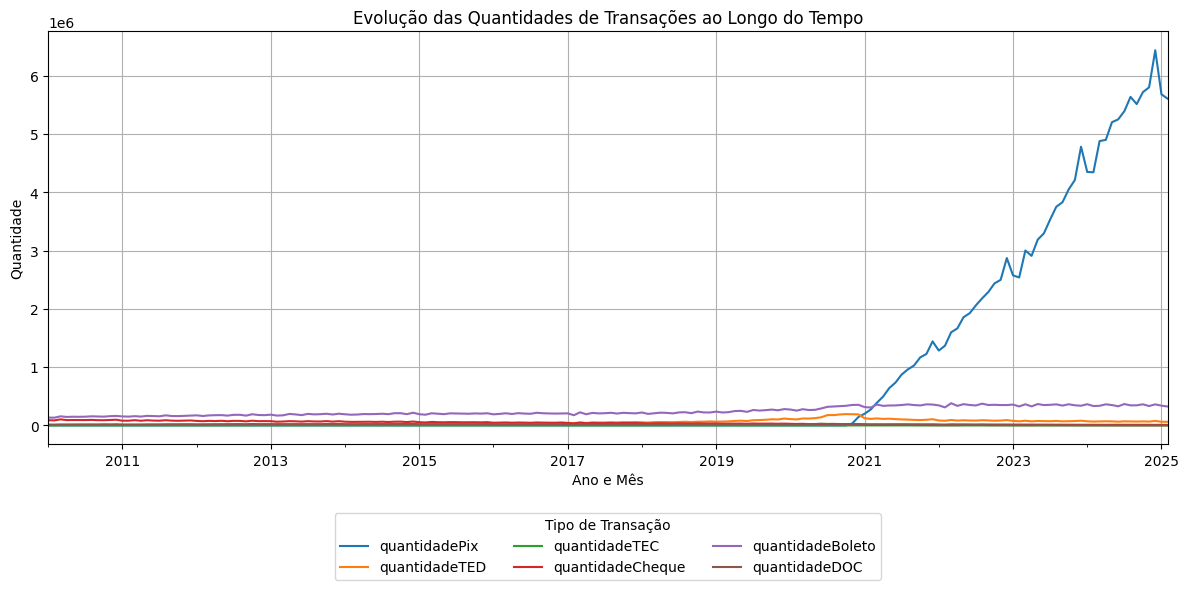

In [8]:
#Comparativo da quantidade de transação
meio_qtd_comp= meio_qtd.copy()

# Defina o índice como 'AnoMes'
meio_qtd_comp.set_index('AnoMes', inplace=True)

# Crie a figura e o eixo
fig, ax = plt.subplots(figsize=(12, 6))

# Plote as colunas de transações
meio_qtd_comp[['quantidadePix', 'quantidadeTED', 'quantidadeTEC', 
          'quantidadeCheque', 'quantidadeBoleto', 'quantidadeDOC']].plot(ax=ax)

# Adicione título e rótulos
ax.set_title('Evolução das Quantidades de Transações ao Longo do Tempo')
ax.set_xlabel('Ano e Mês')
ax.set_ylabel('Quantidade')

# Legenda abaixo do gráfico
ax.legend(
    title='Tipo de Transação',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # Centraliza e coloca abaixo
    ncol=3  # Exibe a legenda em 3 colunas (opcional, ajustável)
)

ax.grid(True)

# Ajusta o layout para dar espaço à legenda
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Aumenta o espaço inferior para a legenda

# Exibe o gráfico
plt.show()


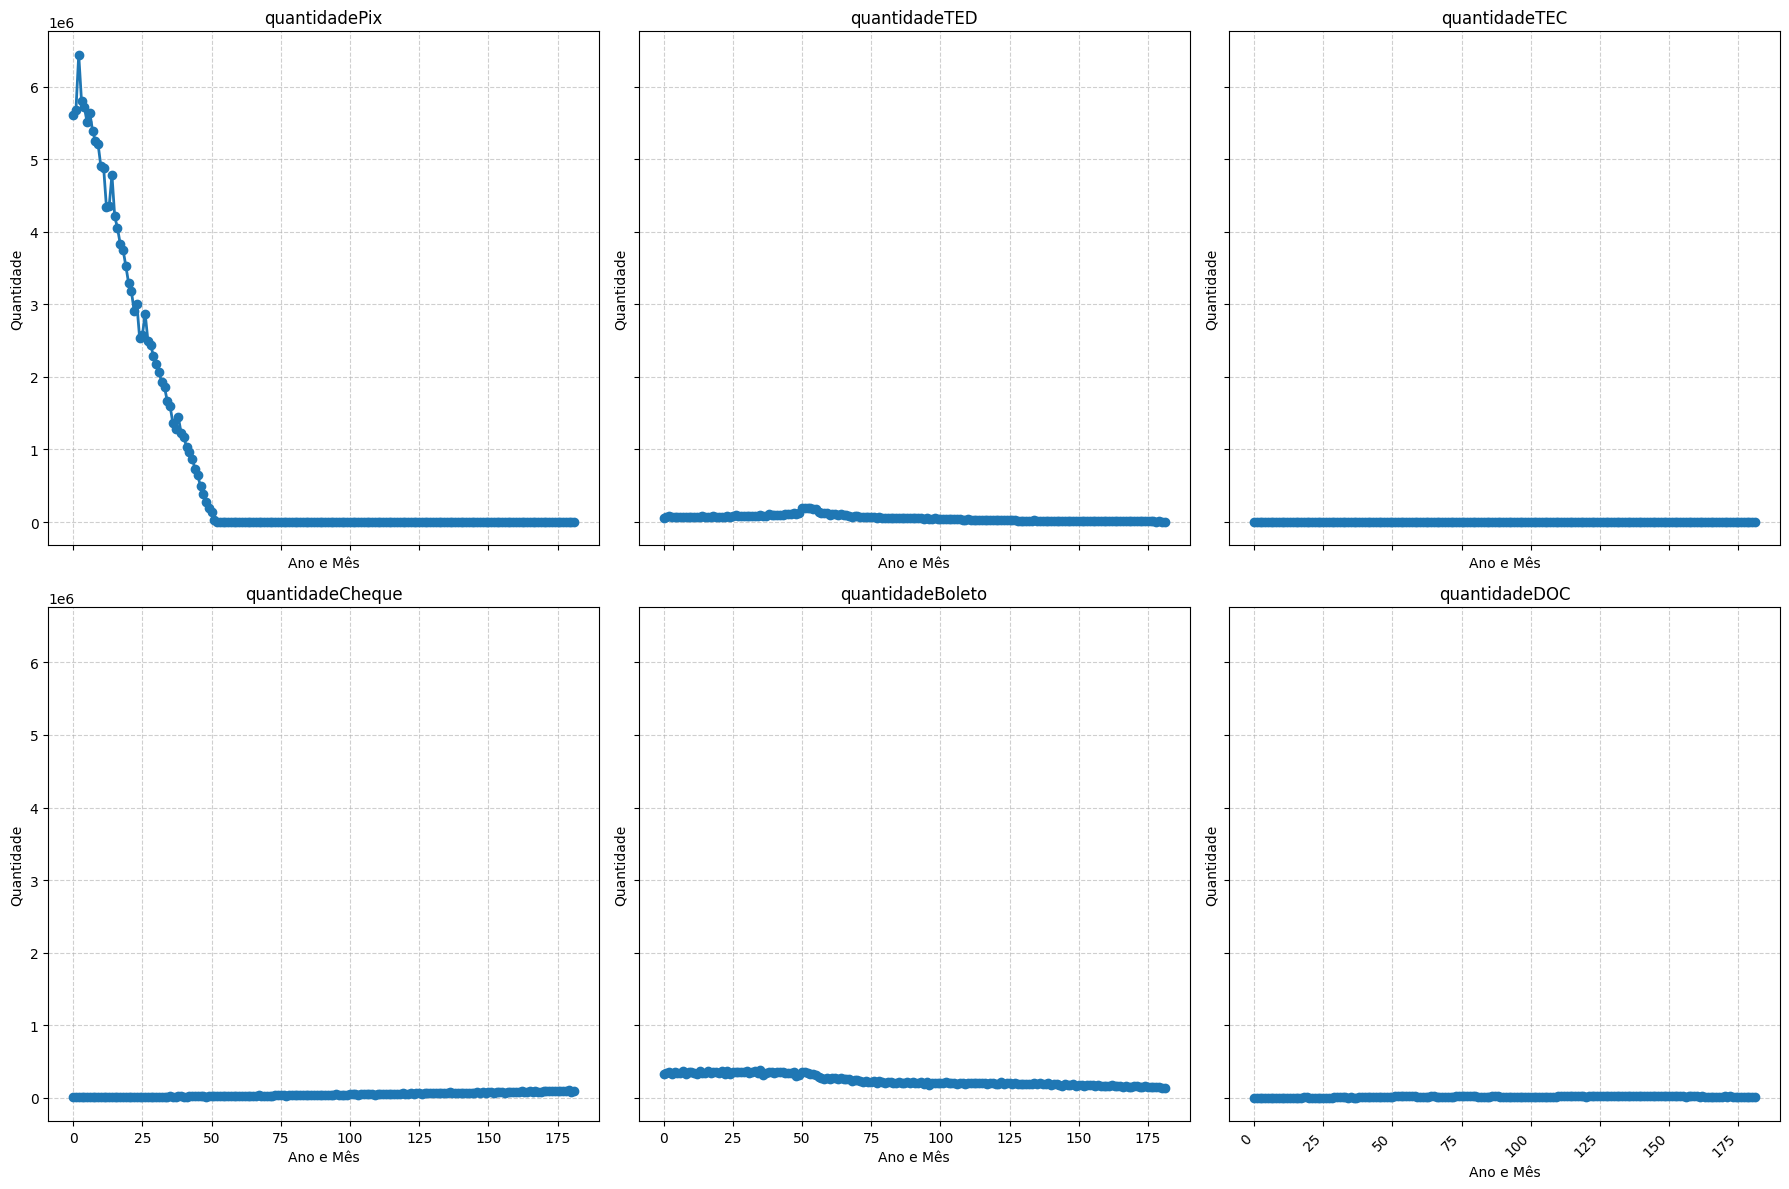

In [9]:
# Evolução por transação
meio_qtd_trans= meio_qtd.copy()
# Defina o índice como 'AnoMes' 
meio_qtd_trans.set_index('AnoMes', inplace=True)
meio_qtd_trans = meio_qtd_trans[meio_qtd_trans.index != 2025]
# Crie o gráfico com múltiplos subgráficos: 2 linhas e 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)

# Lista de transações para plotar
transacoes = ['quantidadePix', 'quantidadeTED', 'quantidadeTEC', 
              'quantidadeCheque', 'quantidadeBoleto', 'quantidadeDOC']

# Plote cada gráfico separadamente
for i, transacao in enumerate(transacoes):
    # Calcule a linha e a coluna para o subplot
    row = i // 3
    col = i % 3
    
    axes[row, col].plot(meio_qtd.index, meio_qtd[transacao], marker='o', color='tab:blue', linewidth=2)
    axes[row, col].set_title(transacao, fontsize=12)
    axes[row, col].set_xlabel('Ano e Mês', fontsize=10)
    axes[row, col].set_ylabel('Quantidade', fontsize=10)
    axes[row, col].grid(True, linestyle='--', alpha=0.6)

# Ajuste a rotação dos rótulos do eixo X para todos os gráficos
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajuste o layout para que os gráficos não fiquem sobrepostos
plt.tight_layout()

plt.show()


In [10]:
# Percentual de crescimento ao ano
meio_qtd_pct= meio_qtd.copy()

# # Crie uma coluna apenas com o ano
meio_qtd_pct['Ano'] = meio_qtd_pct['AnoMes'].dt.year

# Agrupe por ano e some as quantidades
soma_anual = meio_qtd_pct.groupby('Ano')[[
    'quantidadePix', 'quantidadeTED', 'quantidadeTEC',
    'quantidadeCheque', 'quantidadeBoleto', 'quantidadeDOC'
]].sum()

# Calcule o crescimento percentual ano a ano
crescimento_percentual = soma_anual.pct_change() * 100


# Criar o DataFrame de crescimento percentual, arredondado
crescimento_percentual = crescimento_percentual.round(2)
crescimento_percentual = crescimento_percentual.astype(float).round(2)

# Função para aplicar a cor vermelha nos valores negativos
def colorir_negativos(val):
    color = 'red' if val < 0 else 'black'
    return f'color: {color}'

# Filtra o DataFrame excluindo 2010 e 2025
crescimento_percentual = crescimento_percentual[(crescimento_percentual.index != 2010) & (crescimento_percentual.index != 2025)]


# Exibir o DataFrame estilizado com cor para negativos e 2 casas decimais
crescimento_percentual.style \
    .applymap(colorir_negativos) \
    .format("{:.2f}")

,quantidadePix,quantidadeTED,quantidadeTEC,quantidadeCheque,quantidadeBoleto,quantidadeDOC
Ano,,,,,,
2011,nan,20.47,17.32,-9.93,7.13,7.61
2012,nan,17.47,117.60,-9.61,9.42,14.98
2013,nan,49.86,-1.78,-8.54,7.20,4.97
2014,nan,28.90,13.45,-10.01,4.91,2.90
2015,nan,28.09,30.01,-11.73,1.83,-9.61
2016,nan,43.33,-10.10,-14.22,1.40,-20.55
2017,nan,26.76,4.13,-14.80,1.56,4.51
2018,nan,17.27,5.72,-13.18,5.15,11.67
2019,nan,47.10,17.69,-12.18,15.23,-7.29


## Conclusões  da análise descritiva

#### PIX
Cresceu vertiginosamente após o lançamento, em 2020, tornou-se dominante.
Em 2021 aconteceu a explosão de crescimento: +5253,69% — forte adoção inicial.
Entre 2022-2024: Crescimento estabilizado

#### TED
Foi substituída gradualmente, principalmente após a popularização do Pix. É uma tendência clara de obsolescência.
2011-2019: Crescimento moderado e consistente, chegando a +76,78% em 2020.
2021-2024: Queda constante, de -30,02% em 2021 para -8.

#### Cheque
Estão em desaparecimento progressivo, sendo superados por meios eletrônicos. Tendência irreversível.
2011-2025: Queda constante, sem nenhum ano de crescimento.

#### Boleto
Resistiram por um tempo, mas também estão sendo substituídos por meios mais ágeis, como Pix com QR Code.
2011-2020: Crescimento tímido mas contínuo, chegando a +21,16%.
2021-2024: Estabilidade com leve queda.

#### DOC E TEC
Atualmente não existem

# Tendência para o futuro

In [38]:
meio_tend= meio_qtd.copy()
meio_tend= meio_tend[['AnoMes','quantidadePix','quantidadeTED', 'quantidadeBoleto']]
meio_tend.set_index('AnoMes', inplace=True)
meio_tend = meio_tend[['quantidadePix', 'quantidadeTED', 'quantidadeBoleto']].resample('Y').sum()
meio_tend.index = meio_tend.index.year
meio_tend = meio_tend[meio_tend.index != 2025] 

In [40]:
# Normalizando
scaler = StandardScaler()
meio_tend[['quantidadePix', 'quantidadeTED', 'quantidadeBoleto']] = scaler.fit_transform(meio_tend[['quantidadePix', 'quantidadeTED', 'quantidadeBoleto']])

meio_tend


,quantidadePix,quantidadeTED,quantidadeBoleto
AnoMes,,,
2010,-0.499508,-1.152061,-1.292181
2011,-0.499508,-1.112238,-1.144642
2012,-0.499508,-1.071295,-0.935928
2013,-0.499508,-0.934016,-0.761227
2014,-0.499508,-0.814791,-0.633586
2015,-0.499508,-0.665376,-0.583678
2016,-0.499508,-0.370164,-0.544810
2017,-0.499508,-0.108827,-0.500759
2018,-0.499508,0.104884,-0.353435


### Comparativo entre a evolução dos meios de pagamento: PIX, TED e  Boleto

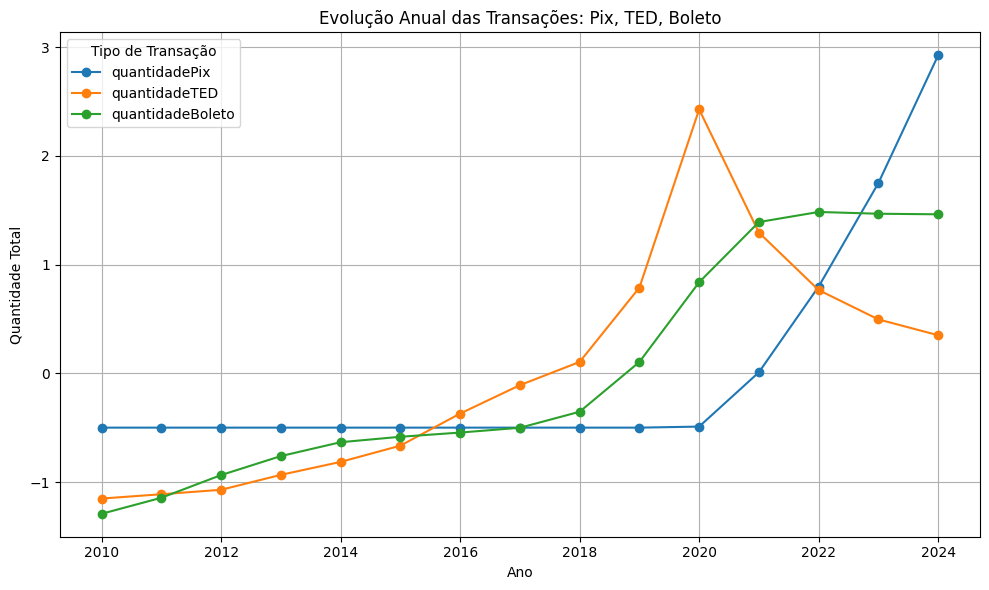

In [44]:
meio_tend.plot(figsize=(10, 6), marker='o')
plt.title('Evolução Anual das Transações: Pix, TED, Boleto')
plt.xlabel('Ano')
plt.ylabel('Quantidade Total')
plt.grid(True)
plt.legend(title='Tipo de Transação')
plt.tight_layout()
plt.show()


### Relação com a Pandemia de Covid19

2020: Início da pandemia (março no Brasil), com forte impacto econômico, social e digital.

2021: Adoção massiva de soluções digitais, ainda sob efeito da pandemia.

2022 em diante: Recuperação econômica, estabilização e consolidação de novos hábitos digitais.

O Pix nasceu como resposta ao novo normal digital — pagamentos rápidos, seguros e sem contato físico. A pandemia criou o ambiente ideal para a adesão em massa. O crescimento contínuo nos anos seguintes reflete sua consolidação como o principal meio de pagamento.

### Previsão da Tendência do PIX até 2030

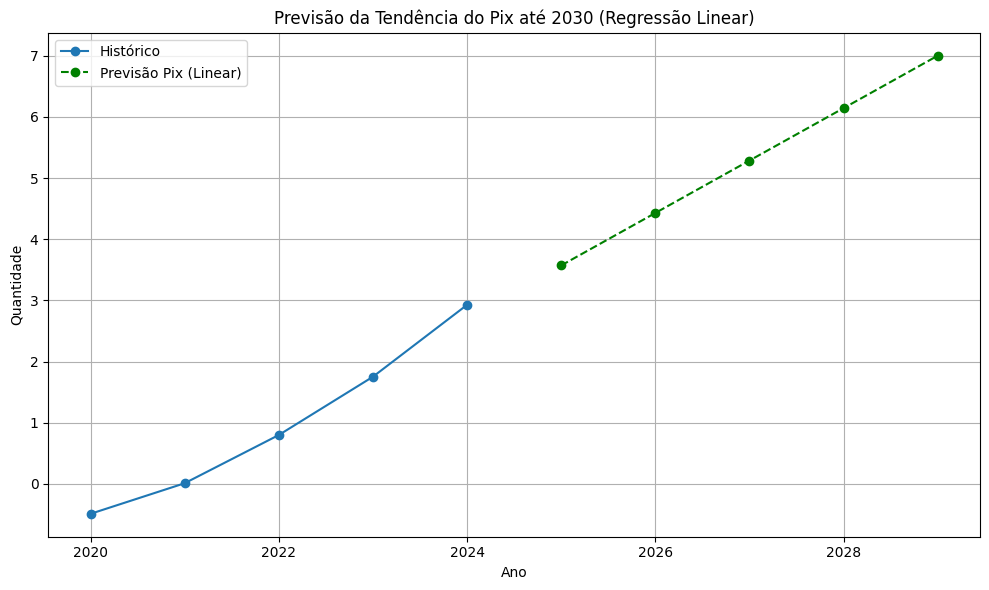

In [27]:
# Filtra os dados a partir de 2020
meio_tend= meio_tend.copy()
meio_tend = meio_tend[meio_tend.index != 2025]
anos_disponiveis = meio_tend[meio_tend.index >= 2020]

# X precisa ser os anos em formato de array (índice)
anos_disponiveis = anos_disponiveis.index.astype(int)
X = anos_disponiveis.values.reshape(-1, 1)

# y precisa ter a mesma quantidade de dados que X
y = anos_disponiveis.map(meio_tend['quantidadePix']).values

# Treinar modelo
modelo_pix = LinearRegression()
modelo_pix.fit(X, y)

# Previsão para anos futuros
anos_futuros = np.arange(2025, 2030).reshape(-1, 1)
prev_pix = modelo_pix.predict(anos_futuros)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(anos_disponiveis, y, marker='o', label='Histórico')
plt.plot(anos_futuros.flatten(), prev_pix, marker='o', linestyle='--', color='green', label='Previsão Pix (Linear)')
plt.title('Previsão da Tendência do PIX até 2030 (Regressão Linear)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
print("Coeficiente (inclinação):", modelo_pix.coef_[0])
print("Intercepto:", modelo_pix.intercept_)


Coeficiente (inclinação): 0.8573156066309405
Intercepto: -1732.4931402390625


O coeficiente indica a taxa de crescimento anual da variável de interesse (quantidadePix). Ou seja, para cada aumento de 1 ano, a quantidade de transações do Pix cresce em 15.876.887,8 unidades (aproximadamente).
Positivo: O valor positivo do coeficiente sugere que a quantidade de transações do Pix tem uma tendência de crescimento ao longo do tempo.

### Previsão da Tendência do TED até 2030

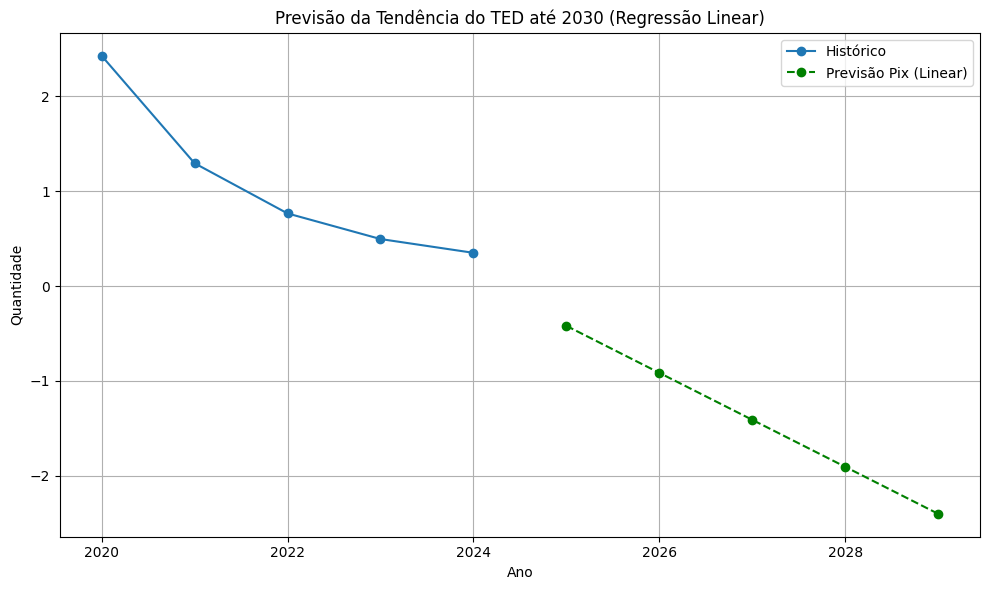

In [29]:
# Filtra os dados a partir de 2020
meio_tend1= meio_tend.copy()
meio_tend1 = meio_tend[meio_tend.index != 2025]
anos_disponiveis1 = meio_tend1[meio_tend1.index >= 2020]

# X precisa ser os anos em formato de array (índice)
anos_disponiveis1 = anos_disponiveis1.index.astype(int)
X = anos_disponiveis1.values.reshape(-1, 1)

# y precisa ter a mesma quantidade de dados que X
y = anos_disponiveis1.map(meio_tend1['quantidadeTED']).values

# Treinar modelo
modelo_pix = LinearRegression()
modelo_pix.fit(X, y)

# Previsão para anos futuros
anos_futuros = np.arange(2025, 2030).reshape(-1, 1)
prev_pix = modelo_pix.predict(anos_futuros)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(anos_disponiveis, y, marker='o', label='Histórico')
plt.plot(anos_futuros.flatten(), prev_pix, marker='o', linestyle='--', color='green', label='Previsão Pix (Linear)')
plt.title('Previsão da Tendência do TED até 2030 (Regressão Linear)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [30]:
print("Coeficiente (inclinação):", modelo_pix.coef_[0])
print("Intercepto:", modelo_pix.intercept_)

Coeficiente (inclinação): -0.49536923702590935
Intercepto: 1002.7036577474234


Esse valor negativo indica que, a cada ano, a quantidade de transações via TED está diminuindo em média cerca de 4954.369 transações.
Isso representa uma tendência de queda linear ao longo do tempo.
Essa queda pode estar sendo causada pela substituição da TED por outros meios mais modernos, como o Pix, que cresceu bastante nos últimos anos.

### Previsão da Tendência do Boleto até 2030

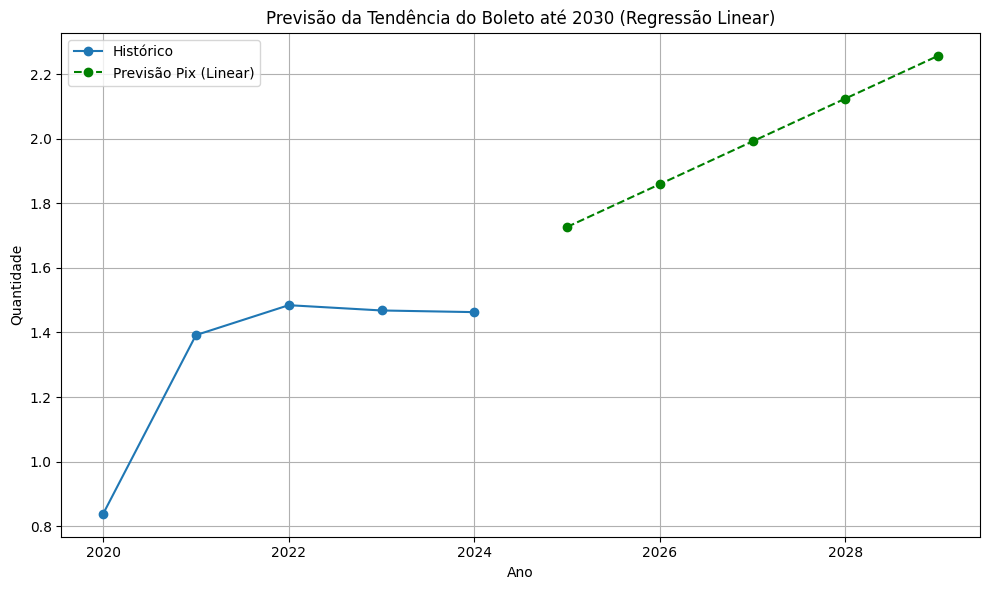

In [31]:
# Filtra os dados a partir de 2020
meio_tend2= meio_tend.copy()
meio_tend2 = meio_tend2[meio_tend2.index != 2025]
anos_disponiveis2 = meio_tend2[meio_tend2.index >= 2020]

# X precisa ser os anos em formato de array (índice)
anos_disponiveis2 = anos_disponiveis2.index.astype(int)
X = anos_disponiveis2.values.reshape(-1, 1)

# y precisa ter a mesma quantidade de dados que X
y = anos_disponiveis2.map(meio_tend2['quantidadeBoleto']).values

# Treinar modelo
modelo_pix = LinearRegression()
modelo_pix.fit(X, y)

# Previsão para anos futuros
anos_futuros = np.arange(2025, 2030).reshape(-1, 1)
prev_pix = modelo_pix.predict(anos_futuros)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(anos_disponiveis, y, marker='o', label='Histórico')
plt.plot(anos_futuros.flatten(), prev_pix, marker='o', linestyle='--', color='green', label='Previsão Pix (Linear)')
plt.title('Previsão da Tendência do Boleto até 2030 (Regressão Linear)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
print("Coeficiente (inclinação):", modelo_pix.coef_[0])
print("Intercepto:", modelo_pix.intercept_)

Coeficiente (inclinação): 0.13260343125536672
Intercepto: -266.7950282010012


O coeficiente positivo indica um leve crescimento anual consistente da variável ao longo do tempo.

### Conclusão

O Pix está substituindo rapidamente os meios tradicionais (TED, boleto).

A TED está sendo abandonada aos poucos, perdendo relevância.

O boleto ainda tem seu espaço, mas não é o método mais dinâmico — está resistindo, mas sem fôlego para crescer muito.